<a href="https://colab.research.google.com/github/ProjetVisionParOrdinateur/vo_projet/blob/main/Efficiently_Locating_Objects_Using_the_Haudorff_Distance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature

/tmp/ipykernel_5179/760980654.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


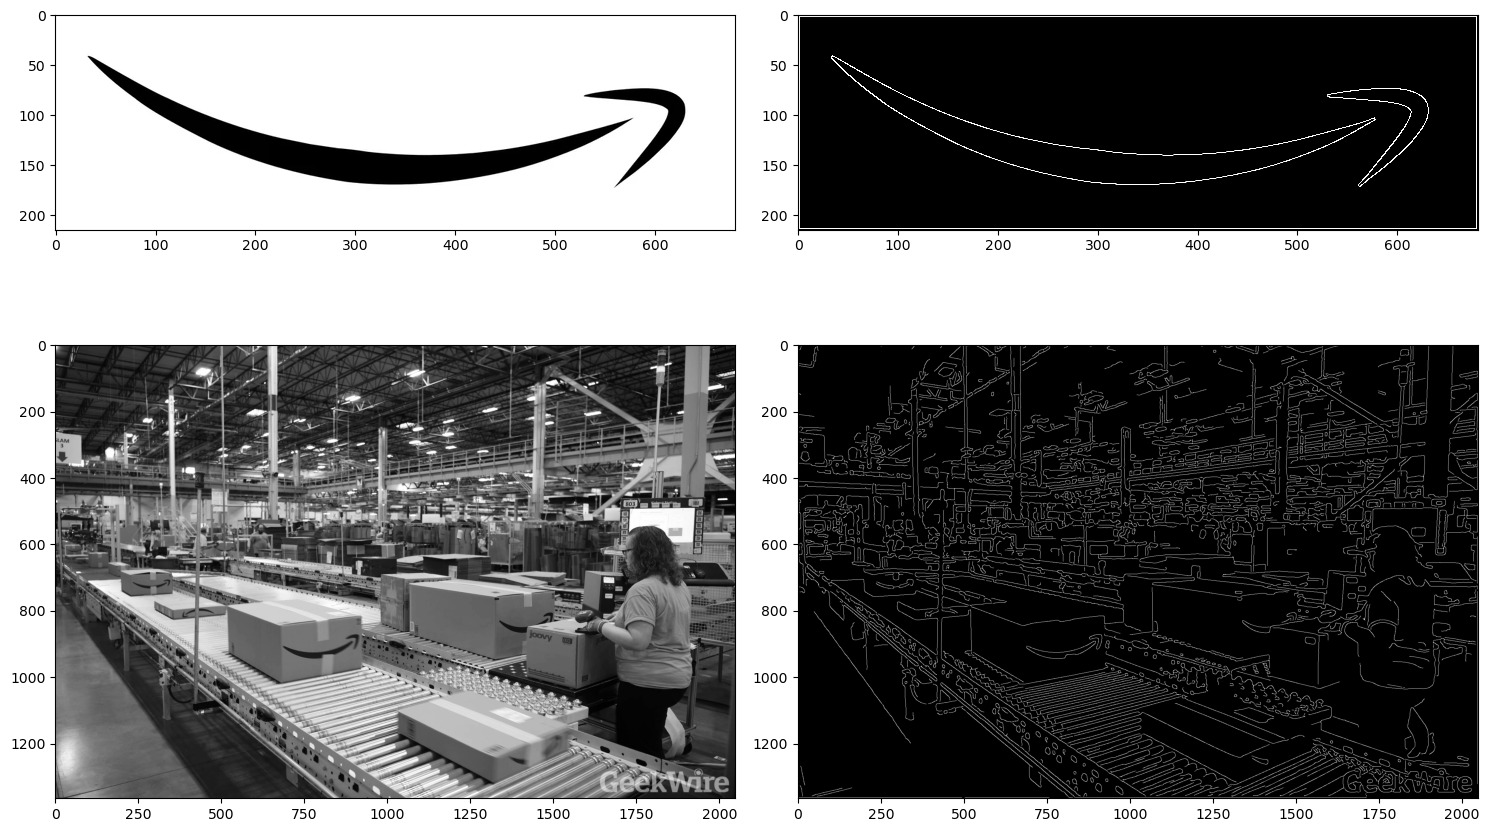

In [ ]:
amazon_logo   = io.imread('./model/Amazon_logo.png', as_gray=True)
amazon_center = io.imread('./image/Amazon_center.png', as_gray=True)

canny_logo = feature.canny(amazon_logo)
canny_center = feature.canny(amazon_center, sigma=3)

fig, axs = plt.subplots(2, 2 , figsize=(15, 10))

axs[0,0].imshow(amazon_logo, cmap='gray')
axs[0,1].imshow(canny_logo, cmap='gray')
axs[1,0].imshow(amazon_center, cmap='gray')
axs[1,1].imshow(canny_center, cmap='gray')

fig.tight_layout()
fig.show()

In [ ]:
def transform(points, a00, a01, a10, a11, tx, ty):
  points_transform = []
  for (x,y) in points:
    points_transform.append((a00*x + a01*y + tx, a10*x + a11*y + ty))

  return points_transform

In [ ]:
def gen_image_transform(points_transform, xmax, ymax):
  image_transform = np.zeros((xmax, ymax))

  for (x,y) in points_transform:
    if 0 <= x and x < image_transform.shape[0] and 0 <= y and y < image_transform.shape[1]:
      image_transform[round(x), round(y)] = 1

  return image_transform

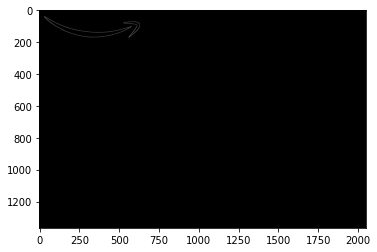

In [ ]:
points_interet_x, points_interet_y = np.nonzero(canny_logo)

xmax, ymax = amazon_center.shape[0], amazon_center.shape[1]

points_transform = transform(zip(points_interet_x, points_interet_y), 1, 0/xmax, 0, 1, 0, 0)

image_transform = gen_image_transform(transform(zip(points_interet_x, points_interet_y), 1, 0/xmax, 0, 1, 0, 0), xmax, ymax)

plt.imshow(image_transform, cmap='gray')
plt.show()

In [ ]:
def init_cells(xmax, ymax):
  return [(np.array([0,0,0,0,0,0]), np.array([xmax, ymax, xmax, ymax, xmax, ymax]))]

def localisation(M, I, tof, tor, ff, fr, d_min, d_max, alpha_max, s_max):
  pass

cells = init_cells(xmax, ymax)

r = 2



# Box-Distance Transform
see part 4.2

In [ ]:
def delta(x, y, I) :
    return np.linalg.norm((-I + np.array([x, y])), axis=1).min() # min des i, x et y sont fixes
    

def box_distance_transform(cell, M, I) :
    # calcul top-left & bottom-right corners
    tlc = cell.min(axis=1)
    brc = cell.max(axis=1)

    w = brc[0] + brc[1] + brc[4] - tlc[0] - tlc[1] - tlc[4] # x-linked dim
    h = brc[2] + brc[3] + brc[5] - tlc[2] - tlc[3] - tlc[5] # y-linked dim
    XY = (np.arange(0, w+1), np.arange(0, h+1)) # x', y'

    box_distance = np.zeros(M.shape[0])
    for i in range(M.shape[0]) : 
        x, y = M[i] # x, y fixe 
        XY_ = XY + (x, y) # x + x', y + y'
        box_distance[i] = (lambda XY_ : np.array([delta(XY_[:], I)])).min()
    return box_distance




    

# Distance de Haursdorff

In [ ]:
def Haursdorff(model, image, ff, fr, tof, tor) :
  # 1 - partial forward Hausdorff distance.
  # Cell-division <=> a cell must satisfy the forward criterion f[t] >= ff   
  ### hff = todo
  # 2 - partial box-reverse Hausdorff distance
  ### hfrbox = todo
  # 3 - Hausdorff distance
  # return max(hff, hfrbox)
  pass